<a href="https://www.kaggle.com/code/naji468/neural-network?scriptVersionId=97309877" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import h5py 
from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-not-cat/train_catvnoncat.h5
/kaggle/input/cat-and-not-cat/test_catvnoncat.h5


# Content
* We make neuarl network model:
** 1-Paramters Inilization
** 2-Forward Propogation 
** 3-Backworad Propogation
** 4-Update Parameters
** put our model in a calss 
* Test Our Model(use it as 1-calss clssifer): against cat and not a cat dataset  
** explore the data set
** train
** predict
** anayze  <br/>
* next?  
i will made a multi-class classifier using our NN model  
and test with MNIST dataset

# Build a Neuarl Netword L-Layer Model

<img src="https://programmer.ink/images/think/b5ff0810ec6aab30c9f5ed5846e3cb86.jpg" style="width:1200px;height:600px;">

## 1-Paramters Inilization

In [2]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    np.random.seed(1)

    L = len(layer_dims)
    parameters = {}
    for l in range(1, L):
        parameters['W'+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])#*0.01, 
        #if we get a more i/p for a layer then it's weights should be small to consider the the i/ps
        #if it less >> higher wiegths 
        parameters['b'+str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

## 2 - Forward Propogation

the pre-activation o/p of a l-layer is $Z^{[l]}=W^{[l]}A^{[l]}+b^{[l]}$

In [3]:
def linear_forward(A_prev, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    Z = np.dot(W, A_prev) + b
    cache = (A_prev, W, b)
    
    return Z, cache

- neural network with hidden layers as a linear acivation does a neural network it's nested linear regression function, to get the sence of the neural network as propgated predictions we use a an non-linear activation function for the hidden layers 
- linear -> activation forward:
<br/>
most common activation function is the Sigmoid and ReLU Function
-**ReLU**: $A = ReLU(Z) = max(0, Z)$. <br/>
this relu works will as it has a linear regression that make the dervitivae of it is 1
-**Sigmoid**:$\Sigma(Z) = \frac{1}{1+e^{-(Z)}}$ <br/>
this as linear activation is perfect or making the bounder of the o/p between {1, 0}

<img src="https://www.researchgate.net/publication/352419028/figure/fig3/AS:1035156496338953@1623811949112/Sigmoid-and-ReLU-functions-In-order-to-optimize-the-model-forward-propagation-and-back.ppm" style="width:600px;height:300px;">

In [4]:
def sigmoid(Z):
    cache = Z
    A = 1/(1+np.exp(-Z))
    
    return A, cache

def relu(Z):
    cache = Z 
    A = np.maximum(0,Z)
        
    return A, cache

In [5]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    Z, linear_cache = linear_forward(A_prev, W, b)#A_prev,W,b
    if activation=="sigmoid":
        A, activation_cache = sigmoid(Z)#Z
    elif activation == "relu":
        A, activation_cache = relu(Z)#Z
    cache = (linear_cache, activation_cache)
    
    return A, cache

### Forward Propogation Function
we do L-1 linear->activation(relu) and 1 linear->activation(sigmoid)<br/>
gat the $\hat{Y} = A^{[L]}$  
<img src="https://cemsarier.github.io/images/perceptron/model_arch_fw.png" style="width:1200px;height:500px;">

In [6]:
def forward_propagation(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- activation value from the output (last) layer
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L of them, indexed from 0 to L-1)
    """
    caches=[]
    A=X
    L=len(parameters)//2
    #linear->relu
    for l in range(1,L):
        A_prev= A
        A,cache = linear_activation_forward(A_prev, parameters['W'+str(l)], parameters['b'+str(l)], "relu")
        caches.append(cache)#  A_prev,W,b  ,,  Z
        
    AL, cache = linear_activation_forward(A, parameters['W'+str(L)], parameters['b'+str(L)], "sigmoid")
    caches.append(cache)
    
    return AL, caches

## Cost Function
Compute the cross-entropy cost $J$: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{1}$$

In [7]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

## 2 - Backward Propgation

<img src="https://discuss.pytorch.org/uploads/default/original/3X/4/d/4d34f014ede7d5bd594815a880ab509a53c96024.png"/>

 ### You want to get $(dW^{[l]}, db^{[l]}, dA^{[l-1]})$.
 \#Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$

\->For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{J} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} $$
$$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{2}$$

In [8]:

def linear_backward(dZ, linear_cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    linear_cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    
    dW = np.dot(dZ, A_prev.T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

 ### You want to get $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$
\#Suppose you have already calculated the derivative $A^{[l]} = \frac{\partial \mathcal{L} }{\partial A^{[l]}}$
\-> $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu().

$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}). $$  


$ReLU'(Z^{[l]}) = 0, Z^{[l]}<0$

$ReLU'(Z^{[l]}) = 1, else$

$  \sigma(s)' = \sigma(s) * (1-\sigma(s))$

In [9]:

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [10]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache  = cache
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif  activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache) 
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

 ### You want to get $A^{[l]} = \frac{\partial \mathcal{L} }{\partial A^{[l]}}$
 For layer $l$, 
 
 you get it from the o/p of the layer $l+1$, equation (1)

 For layer $L$, 
 
 you compute $\frac{\partial \mathcal{L} }{\partial A^{[L]}}$
 
 from (1)
 ```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

### Backward Propogation Function

In [11]:
def backward_propogation(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (forward_propogation())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    #first dAL, the backward propgate to the 0-layer
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
    grades={}
    m = AL.shape[1]
    L = len(caches)
    Y = Y.reshape( AL.shape)
    
    #cache the L-layer in index l-1
    L_cache = caches[L-1]
    dA_prev_L, dW_L, db_L = linear_activation_backward(dAL, L_cache, "sigmoid")
    grades["dA"+str(L-1)] = dA_prev_L
    grades["dW"+str(L)] = dW_L
    grades["db"+str(L)] = db_L
    #dA-1 
    #layer L gradients saved, good job
    
    for l in reversed(range(L-1)): 
        #index = l : 0,1,..,L-2 #reversed-> L-2, L-3, ....,0
        #layers: L-1, L-2, ...., 1
        l_cache = caches[l]
        # you get it from the o/p of the layer $l+1$, equation (1)
        dA_prev_l, dW_l, db_l = linear_activation_backward(grades["dA"+str(l+1)], l_cache, "relu")
        #layers: L-1, L-2, ...., 1
        grades["dA"+str(l)] = dA_prev_l
        grades["dW"+str(l+1)] = dW_l
        grades["db"+str(l+1)] = db_l
    
    return grades        

## 4-Update Parameters

In [12]:
def update_parameters(params, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    params -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    parameters = params.copy()
    L = len(parameters) // 2 # number of layers in the neural network

    for l in range(L):
        parameters["W"+str(l+1)]=parameters["W"+str(l+1)]-learning_rate*grads["dW"+str(l+1)]
        parameters["b"+str(l+1)]=parameters["b"+str(l+1)]-learning_rate*grads["db"+str(l+1)]
    
    return parameters

### Build a L-Layer Neuarl Network Model in a Class

In [13]:
class NeuralNetwork():
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    """
    def __init__(self, layers_dims, learning_rate, num_iterations):
        self.layers_dims = layers_dims
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        # 1 - Parameters initialization.
        self.parameters = initialize_parameters_deep(self.layers_dims)
        
    def fit(self, X, Y):
        """"
        Arguments:
        X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
        Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
        """
        for i in range(self.num_iterations):
            # 2 - Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
            parameters = self.parameters.copy()
            AL, caches = forward_propagation(X, parameters)
            
            
            # 3 - Backward propagation.
            grads = backward_propogation(AL, Y, caches)

            # 4 - Update parameters.
            self.parameters = update_parameters(parameters, grads, self.learning_rate)
            
        
    def predict(self, X):
        """
        Arguments:
        X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
        """
                
        m = X.shape[1]
        parameters = self.parameters.copy()
        
        probas, caches =  forward_propagation(X, parameters)
        
        return probas    

# Test Our Model: #against cat and not a cat dataset

## explore the data set

### load the data

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [15]:
def load_dataset():
    train_dataset = h5py.File('../input/cat-and-not-cat/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"]) # your train set labels

    test_dataset = h5py.File('../input/cat-and-not-cat/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"]) # your test set labels

    classes = np.array(test_dataset["list_classes"]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [16]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()


## inspect 1 picture

y = 0. It's a non-cat picture.


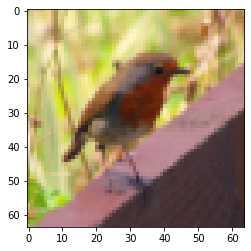

In [17]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [18]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [19]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train's percentage of the data: {:.0f}%".format( 100*train_x.shape[1]/(train_x.shape[1]+test_x.shape[1])))
print ("test's percentage of the data: {:.0f}%".format( 100*test_x.shape[1]/(train_x.shape[1]+test_x.shape[1])))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)
train's percentage of the data: 81%
test's percentage of the data: 19%


## Train

In [20]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

model = NeuralNetwork(layers_dims, learning_rate = 0.0075, num_iterations = 3000)
    
model.fit(train_x, train_y)

## Predict

In [21]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)
pred_test

array([[0.99951056, 0.99805689, 0.97907398, 0.89050081, 0.99169416,
        0.70077026, 0.80750528, 0.99967125, 0.99015284, 0.99056644,
        0.9982026 , 0.56274941, 0.99457576, 0.9999278 , 0.05938817,
        0.99878238, 0.17329833, 0.996812  , 0.82526696, 0.07298475,
        0.99489008, 0.1311916 , 0.05938817, 0.85976322, 0.95195746,
        0.99549491, 0.97476965, 0.05938817, 0.18344278, 0.99854882,
        0.96252836, 0.9999584 , 0.99803644, 0.986603  , 0.87796892,
        0.05938817, 0.07848243, 0.82817069, 0.93953773, 0.05938817,
        0.97111678, 0.98363823, 0.81547701, 0.05938817, 0.96918288,
        0.99908732, 0.53453536, 0.99999845, 0.54445401, 0.1090705 ]])

In [22]:
pred_train[pred_train>=0.5]=1
pred_train[pred_train<0.5]=0

pred_test[pred_test>=0.5]=1
pred_test[pred_test<0.5]=0
pred_test

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 0.]])

## Analyze

In [23]:
print("Accurecy of train data: {:.2f}%".format(100*np.sum(pred_train==train_y)/train_y.size))
print("Accurecy of test data: {}%".format(100*np.sum(pred_test==test_y)/test_y.size))

Accurecy of train data: 99.04%
Accurecy of test data: 82.0%


y = 0.13754803662141257,  L-layer model predicts a "non-cat" picture.


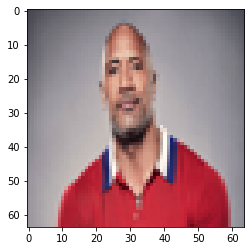

In [24]:
from PIL import Image
import requests
from io import BytesIO
url1 = "https://bluebuffalo.com/globalassets/00-redesign/articles/cat-articles/how-to-introduce-two-cats/01_adding_cat_body1.jpg"
url2 = "https://tvnz-1-news-prod.cdn.arcpublishing.com/resizer/pBHCGaEZv6-KtsIRxoiOpGU133M=/800x450/filters:format(jpg):quality(70):focal(-5x-5:5x5)/cloudfront-ap-southeast-2.images.arcpublishing.com/tvnz/SOYANY2MQ5CSVFOTG6NXOWTSXY.jpg"
url3 = "https://www.dmarge.com/wp-content/uploads/2021/01/dwayne-the-rock-.jpg"


url = url3
response = requests.get(url)

img = Image.open(BytesIO(response.content))

image = np.array(img.resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

images = image

my_predicted_images = model.predict(images)

my_predicted_image = my_predicted_images
print ("y = " + str(np.squeeze(my_predicted_image)) + 
       ",  L-layer model predicts a \"" +
       classes[int(my_predicted_image[0][0]+0.5)].decode("utf-8") +
       "\" picture.")